# י שיעור $4$: ניתוח מבחין לינארי ($Linear\ Discriminant\ Analysis$ – $LDA$) י  

## י מהי שיטת $LDA$? י  

י $Linear\ Discriminant\ Analysis$ (ניתוח מבחין לינארי) היא שיטת סיווג סטטיסטית נפוצה, המבוססת על מודל הסתברותי. השיטה פותחה במקור לניתוח נתונים עם יותר משתי קבוצות, אך היא שימושית ונפוצה גם לבעיות סיווג בינאריות. י  

⸻

## י רעיון מרכזי בשיטת $LDA$: י  

י המודל מניח שהתכונות ($Features$) בכל קבוצה ($class$) מתפלגות לפי התפלגות נורמלית רב-משתנית ($Multivariate\ Normal\ Distribution$) עם: י  

- י תוחלת שונה ($\mu_k$), לכל קבוצה. י  
- י מטריצת שונות-שונות משותפת ($\Sigma$) עבור כל הקבוצות (כלומר, לכל הקבוצות אותה מטריצת קו-ואריאנס). י  

י כלומר: י  
- י כל קבוצה מיוצגת על ידי התפלגות נורמלית רב-ממדית ($Multivariate\ Gaussian$). י  
- י ההבדל היחיד בין הקבוצות הוא בממוצעים שלהן ($\mu_k$), בעוד שהקבוצות חולקות את אותה מטריצת השונות ($\Sigma$). י  

⸻

## י השלבים לבניית מודל $LDA$: י  

### י שלב $1$: ההסתברויות האפריוריות ($Prior\ probabilities$) י  

י אנחנו מניחים הסתברות אפריורית $\pi_k$ לכל קבוצה $k$: י  

$$
\pi_k = P(Y = k)
$$

י אם אין לנו ידע מוקדם על ההסתברויות הללו, בדרך כלל מניחים שהן שוות או מחשבים אותן מתוך הנתונים (למשל, אחוז התצפיות מכל קבוצה). י  

⸻

### י שלב $2$: פונקציית הצפיפות ($Class\ conditional\ density$) י  

י המודל מניח שלכל קבוצה יש התפלגות גאוסיאנית רב-ממדית: י  

$$
f_k(x) = \frac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(x - \mu_k)^T\Sigma^{-1}(x - \mu_k)\right)
$$

י כאשר: י  
- י $x$ וקטור התכונות. י  
- י $\mu_k$ – וקטור התוחלות של התכונות בקבוצה $k$. י  
- י $\Sigma$ – מטריצת הקו-וריאנס המשותפת לכל הקבוצות. י  

⸻

### י שלב ההחלטה: חוק בייס ($Bayes'\ Rule$) י  

י כדי לקבל את ההסתברות הפוסטריורית ($posterior\ probability$) לתצפית חדשה $X=x$: י  

$$
P(Y=k|X=x) = \frac{\pi_k f_k(x)}{\sum_{j=1}^{K}\pi_j f_j(x)}
$$

י הסיווג נעשה לפי הקבוצה בעלת ההסתברות הפוסטריורית הגבוהה ביותר. י  

⸻

## י גבול ההחלטה ($Decision\ boundary$) ב-$LDA$: י  

י בשיטת $LDA$, גבול ההחלטה (הגבול בין קבוצות) הוא תמיד לינארי. הגבול נקבע על ידי השוואת ההסתברויות הפוסטריוריות של כל זוג קבוצות: י  

י גבול ההחלטה בין קבוצה $k$ לקבוצה $l$: י  

$$
\log\frac{P(Y=k|X=x)}{P(Y=l|X=x)} = 0
$$

י לאחר מעט אלגברה מקבלים ביטוי לינארי מפורש בגבול: י  

$$
x^T \Sigma^{-1}(\mu_k - \mu_l) - \frac{1}{2}(\mu_k + \mu_l)^T\Sigma^{-1}(\mu_k - \mu_l) + \log\frac{\pi_k}{\pi_l}=0
$$

י זהו בדיוק קו או מישור לינארי (תלוי במספר התכונות). י  

⸻

## י כיצד מחשבים את הפרמטרים בפועל? י  

י הפרמטרים $\mu_k, \Sigma$, ו-$\pi_k$ אינם ידועים מראש. הם מחושבים מתוך הנתונים באמצעות הערכה בשיטת $Maximum\ Likelihood$: י  

- י הסתברות אפריורית $\hat{\pi}_k$: י  

$$
\hat{\pi}_k = \frac{N_k}{N}
$$

י כאשר $N_k$ – מספר התצפיות בקבוצה $k$, ו-$N$ – מספר התצפיות הכולל. י  

- י ממוצע לכל קבוצה $\hat{\mu}_k$: י  

$$
\hat{\mu}_k = \frac{1}{N_k}\sum_{i:Y_i=k} x_i
$$

- י מטריצת הקו-ואריאנס $\hat{\Sigma}$: י  

$$
\hat{\Sigma} = \frac{1}{N-K}\sum_{k=1}^{K}\sum_{i:y_i=k}(x_i-\hat{\mu}_k)(x_i-\hat{\mu}_k)^T
$$

⸻

## י ההבדל בין $LDA$ לרגרסיה לוגיסטית: י  

| י נקודת השוואה י            | י $LDA$ י                                   | י $Logistic\ Regression$ י                  |
|------------------------------|--------------------------------------------|---------------------------------------------|
| י גישה הסתברותית י         | י מניחה פיזור גאוסיאני משותף י            | י אינה מניחה התפלגות ספציפית י            |
| י גבול החלטה י              | י לינארי י                                 | י לינארי י                                 |
| י אופן ההערכה י             | י $Maximum\ Likelihood$ עבור התפלגות גאוסיאנית י | י $Maximum\ Likelihood$ של הפונקציה הלוגיסטית י |
| י ביצועים י                 | י עדיף אם ההנחות הגאוסיאניות מתקיימות י | י עדיף כשההנחות של $LDA$ לא מתקיימות י |


⸻

## י דוגמה ויזואלית י  

י דמיין/י סיטואציה פשוטה עם שתי תכונות ($Feature\ 1$ ו-$Feature\ 2$) ושתי קבוצות ($Class\ A$ ו-$Class\ B$). כך שיש לנו מרחב דו-ממדי (ציר $X$ וציר $Y$) ובו פיזור נקודות משתי קבוצות: י  

1. י $Class\ A$: מסומנת בנקודות עיגול כחולות. י  
2. י $Class\ B$: מסומנת בנקודות משולש אדומות. י  

### י שלב 1: תיאור פיזור הנקודות י  
- י נסמן על הגרף את כל תצפיות $Class\ A$ בכחול ואת כל תצפיות $Class\ B$ באדום. י  
- י במבט "בעין", כל קבוצה מפוזרת סביב מרכז (הממוצע שלהן), אבל יש חפיפה מסוימת בין העננים. י  

### י שלב 2: הערכת הפרמטרים י  

י כדי ליישם $LDA$, אנחנו צריכים לאמוד מתוך הדגימה את: י  
- י $\hat{\mu}_A$ – וקטור הממוצעים של $Class\ A$ (דו-ממדי: $(\mu_{A1}, \mu_{A2})$). י  
- י $\hat{\mu}_B$ – וקטור הממוצעים של $Class\ B$. י  
- י $\hat{\Sigma}$ – מטריצת הקו-וריאנס המשותפת. י  
- י $\hat{\pi}_A, \hat{\pi}_B$ – ההסתברויות האפריוריות (החלק היחסי של כל קבוצה במדגם). י  

### י שלב 3: מציאת גבול ההחלטה ($Decision\ Boundary$) י  

י לאחר שאמדנו את הפרמטרים, אנחנו מחשבים את הביטוי: י  

$$
x^T \Sigma^{-1} (\mu_A - \mu_B) - \frac{1}{2} (\mu_A + \mu_B)^T \Sigma^{-1} (\mu_A - \mu_B) + \log \frac{\pi_A}{\pi_B} = 0
$$

י נשים לב שזהו ביטוי לינארי ב-$x$. בגרף הדו-ממדי, זה יתורגם ל"קו" (ישר) שיחצה את המרחב לשני אזורים. י  

### י שלב 4: הדגמת הסיווג י  

י כעת, אם נקבל תצפית חדשה, נמקם אותה על הגרף ונראה באיזה צד של הקו היא נופלת. י  
- י אם היא בצד של $Class\ A$, תסווג ל-$A$. י  
- י אם בצד של $Class\ B$, תסווג ל-$B$. י  

⸻


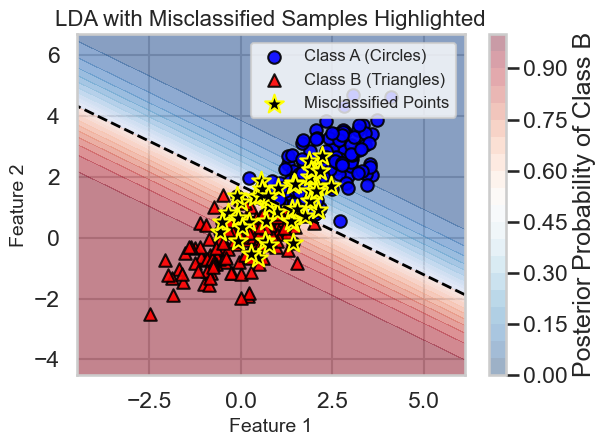

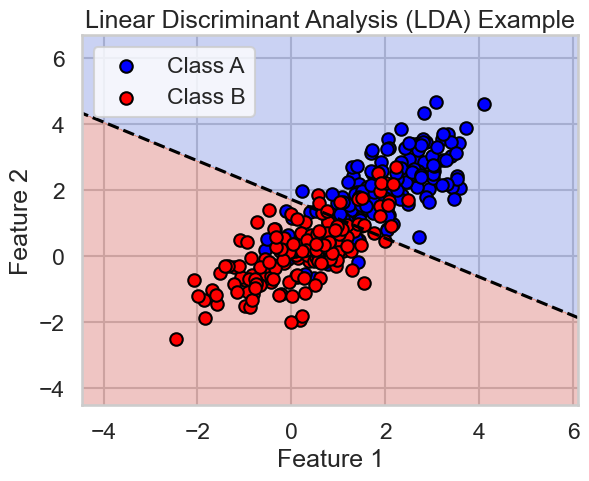

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def plot_cov_ellipse(mean, cov, ax, n_std=2.0, edgecolor='black', lw=2, **kwargs):
    """ציור אליפסה שמייצגת את אזור הקו-וריאנס סביב הממוצע."""
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]

    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    width, height = 2 * n_std * np.sqrt(vals)

    ellipse = Ellipse(
        xy=mean, width=width, height=height,
        angle=theta, edgecolor=edgecolor, facecolor='none', lw=lw, **kwargs
    )
    ax.add_patch(ellipse)


np.random.seed(0)

sns.set_style('whitegrid')
sns.set_context('talk')

# יצירת נתונים מדומים
mu_A = [2, 2]
mu_B = [0, 0]
cov  = [[1, 0.7],
         [0.7, 1]]
n_samples = 150

classA = np.random.multivariate_normal(mu_A, cov, n_samples)
classB = np.random.multivariate_normal(mu_B, cov, n_samples)

X = np.vstack((classA, classB))
y = np.array([0]*n_samples + [1]*n_samples)

# מודל LDA עם store_covariance=True
lda_model = LDA(store_covariance=True)
lda_model.fit(X, y)


# הממוצעים ומטריצת הקו-וריאנס
mu_est_A, mu_est_B = lda_model.means_[0], lda_model.means_[1]
Sigma_est = lda_model.covariance_

# חיזוי על **אותם נתוני אימון** (או נתוני בדיקה אם יש)
y_pred = lda_model.predict(X)
misclassified = (y_pred != y)  # בוליאני שמציין נקודות שגויות

# הכנת רשת לגבולות ההחלטה
x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

Z_class = lda_model.predict(grid_points).reshape(xx.shape)
Z_proba = lda_model.predict_proba(grid_points)
Z_proba_B = Z_proba[:, 1].reshape(xx.shape)



fig, ax = plt.subplots()

# רקע הסיווג
ax.contourf(xx, yy, Z_class, alpha=0.2, cmap=plt.cm.coolwarm)

# מפה רציפה של הסתברות פוסטריורית ל-B
cont = ax.contourf(xx, yy, Z_proba_B, levels=20, alpha=0.4, cmap='RdBu_r', vmin=0, vmax=1)
cbar = fig.colorbar(cont, ax=ax)
cbar.set_label("Posterior Probability of Class B")

# קו ההחלטה - הסתברות B = 0.5
ax.contour(xx, yy, Z_proba_B, levels=[0.5], colors='black', linestyles='--', linewidths=2)

# נקודות Class A
ax.scatter(classA[:, 0], classA[:, 1], marker='o', color='blue', alpha=0.9, edgecolor='k', label='Class A (Circles)')
# נקודות Class B
ax.scatter(classB[:, 0], classB[:, 1], marker='^', color='red', alpha=0.9, edgecolor='k', label='Class B (Triangles)')

# זיהוי נקודות שסווגו בטעות:
X_mis = X[misclassified]
# נצייר אותן עם סימון ייחודי (כוכבית שחורה למשל):
ax.scatter(X_mis[:, 0], X_mis[:, 1],
           marker='*', s=200,
           color='black', edgecolor='yellow',
           label='Misclassified Points')

ax.set_xlabel('Feature 1', fontsize=14)
ax.set_ylabel('Feature 2', fontsize=14)
ax.set_title('LDA with Misclassified Samples Highlighted', fontsize=16)
ax.legend(loc='upper right', fontsize=12)
plt.tight_layout()

plt.show()


#  שרטוט תוצאות
plt.figure()

# ציור אזורי ההחלטה כקונטור
plt.contourf(xx, yy, Z_class, alpha=0.3, cmap=plt.cm.coolwarm)

# ציור נקודות הקבוצה הראשונה (Class A)
plt.scatter(classA[:, 0], classA[:, 1],
            color='blue', edgecolors='k', label='Class A')

# ציור נקודות הקבוצה השנייה (Class B)
plt.scatter(classB[:, 0], classB[:, 1],
            color='red', edgecolors='k', label='Class B')

# ציור קו ההפרדה (ע"י קונטור)
# נמצא את קו הגבול היכן ש-predict_proba הוא 0.5 עבור Class 1 (לדוגמה)
lda_proba = lda_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
lda_proba = lda_proba[:, 1].reshape(xx.shape)
plt.contour(xx, yy, lda_proba, levels=[0.5], colors='black', linestyles='--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear Discriminant Analysis (LDA) Example')
plt.legend()
plt.show()



## י חלק ב': הסבר מעמיק של $LDA$ דרך הדוגמה י  

### י $1$. הנחת העבודה ב-$LDA$ י  
- י כל קבוצה מתפלגת גאוסיאנית עם תוחלת שונה וקו-וריאנס משותפת ($\Sigma$). י  

### י $2$. פונקציות הצפיפות ותפקידן י  

$$
f_k(x) = \frac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(x - \mu_k)^T\Sigma^{-1}(x - \mu_k)\right)
$$

### י $3$. הסתברויות אפריוריות ($Prior$) י  

י מחשבים מתוך הנתונים: י  
- י $\pi_k = P(Y=k)$ י  

### י $4$. חוק בייס וההסתברויות הפוסטריוריות י  

$$
P(Y=k|X=x) = \frac{\pi_k f_k(x)}{\sum_{j=1}^{K}\pi_j f_j(x)}
$$

### י $5$. גבול ההחלטה הלינארי י  

$$
\log \frac{P(Y=A|X=x)}{P(Y=B|X=x)} = 0
$$

י מתורגם לביטוי לינארי במפורש: י  

$$
x^T \Sigma^{-1} (\mu_A - \mu_B) - \frac12(\mu_A + \mu_B)^T\Sigma^{-1} (\mu_A - \mu_B) + \log\frac{\pi_A}{\pi_B} = 0
$$

### י $6$. כיצד מעריכים בפועל ($Maximum\ Likelihood\ Estimation$) י  
- י $\hat{\pi}_k = \frac{N_k}{N}$ י  
- י $\hat{\mu}_k = \frac{1}{N_k}\sum_{i:y_i=k} x_i$ י  
- י $\hat{\Sigma} = \frac{1}{N-K}\sum_{k=1}^{K}\sum_{i:y_i=k}(x_i-\hat{\mu}_k)(x_i-\hat{\mu}_k)^T$ י  

⸻

## י לסיכום י  
- י בדוגמה הוויזואלית ראינו איך $LDA$ בונה קו החלטה לינארי על בסיס הנחה של נורמליות וקו-וריאנס משותפת. י  
- י היתרון של $LDA$ הוא פשטותו ויכולתו לספק הסתברות. החיסרון הוא ההנחה הקשיחה יחסית לגבי מבנה הנתונים. י  

י בשורה התחתונה, Linear Discriminant Analysis ($LDA$) הוא אחד האלגוריתמים הוותיקים והיעילים ביותר בתחום הסיווג הסטטיסטי, ובדוגמה הקטנה שקל לראות איך הוא בונה קו החלטה שמפריד בין שני ענני נקודות בצורה לינארית. י  
